In [92]:
import sys
import os
import SimpleITK
import numpy
import matplotlib.pyplot
import subprocess
import json
import config
import getData
import segmentation
import importlib
importlib.reload(segmentation)
importlib.reload(getData)
importlib.reload(config)

sys.path.append(os.path.join(os.path.expanduser('~'),'software','src','nixSuite','wrapper'))
import nixWrapper
nixWrapper.loadLibrary('labkeyInterface')
import labkeyInterface
import labkeyFileBrowser
import labkeyDatabaseBrowser

#manipulate segmentations
#rewrite this
#nim=getPatientNIM(pId)



loadLibrary
remoteSourcesURL https://git0.fmf.uni-lj.si/studen/nixSuite/raw/master/remoteResources/resources.json
{'labkeyInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/labkeyInterface/archive/master.zip', 'branch': 'master', 'modules': []}, 'irAEMM': {'url': 'https://git0.fmf.uni-lj.si/studen/iraemm/archive/master.zip', 'branch': 'master', 'modules': ['iraemmBrowser']}, 'SlicerLabkeyExtension': {'url': 'https://git0.fmf.uni-lj.si/studen/SlicerLabkeyExtension/archive/SlicerExtensionIndex.zip', 'branch': 'SlicerExtensionIndex', 'modules': ['labkeyBrowser']}, 'limfomiPET': {'url': 'https://git0.fmf.uni-lj.si/studen/limfomiPET/archive/master.zip', 'branch': 'master', 'modules': ['imageBrowser', 'segmentationBrowser']}, 'parseConfig': {'url': 'https://git0.fmf.uni-lj.si/studen/parseConfig/archive/master.zip', 'branch': 'master', 'modules': []}, 'orthancInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/orthancInterface/archive/master.zip', 'branch': 'master', 'modules': []}}
{'

In [33]:
#

fsetup='../template/cardiacSPECT.json'
with open(fsetup,'r') as f:
    setup=json.load(f)

db,fb=getData.connectDB(setup['network'])    
    


loadLibrary
remoteSourcesURL https://git0.fmf.uni-lj.si/studen/nixSuite/raw/master/remoteResources/resources.json
{'labkeyInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/labkeyInterface/archive/master.zip', 'branch': 'master', 'modules': []}, 'irAEMM': {'url': 'https://git0.fmf.uni-lj.si/studen/iraemm/archive/master.zip', 'branch': 'master', 'modules': ['iraemmBrowser']}, 'SlicerLabkeyExtension': {'url': 'https://git0.fmf.uni-lj.si/studen/SlicerLabkeyExtension/archive/SlicerExtensionIndex.zip', 'branch': 'SlicerExtensionIndex', 'modules': ['labkeyBrowser']}, 'limfomiPET': {'url': 'https://git0.fmf.uni-lj.si/studen/limfomiPET/archive/master.zip', 'branch': 'master', 'modules': ['imageBrowser', 'segmentationBrowser']}, 'parseConfig': {'url': 'https://git0.fmf.uni-lj.si/studen/parseConfig/archive/master.zip', 'branch': 'master', 'modules': []}, 'orthancInterface': {'url': 'https://git0.fmf.uni-lj.si/studen/orthancInterface/archive/master.zip', 'branch': 'master', 'modules': []}}
{'

['0', '1', '2']
{'0': [[32, 31, 33], [32, 31, 29], [32, 31, 37]], '1': [[32, 31, 33], [32, 27, 33], [32, 35, 33]], '2': [[32, 31, 33], [32, 31, 29], [32, 31, 37], [32, 27, 33], [32, 35, 33]]}
{'0': '0;1;2', '1': '0;2', '2': '0;2', '3': '1;2', '4': '1;2'}
User: andrej studen CSRF: d292fd9b84d4b81250b57e44671b5511
User: andrej studen CSRF: 174a035e610ebbfbd3995a837df4a71f
User: andrej studen CSRF: 76e815114a15527d1bd7a3e9b97f7c6e
User: andrej studen CSRF: 2536c635ca3638926a96a00a738f83d1
User: andrej studen CSRF: ee9e2ae14f1e8250c36ce8197307b38d
Done
User: andrej studen CSRF: 894f2f13bd2431fb46ee00e82a72aba1


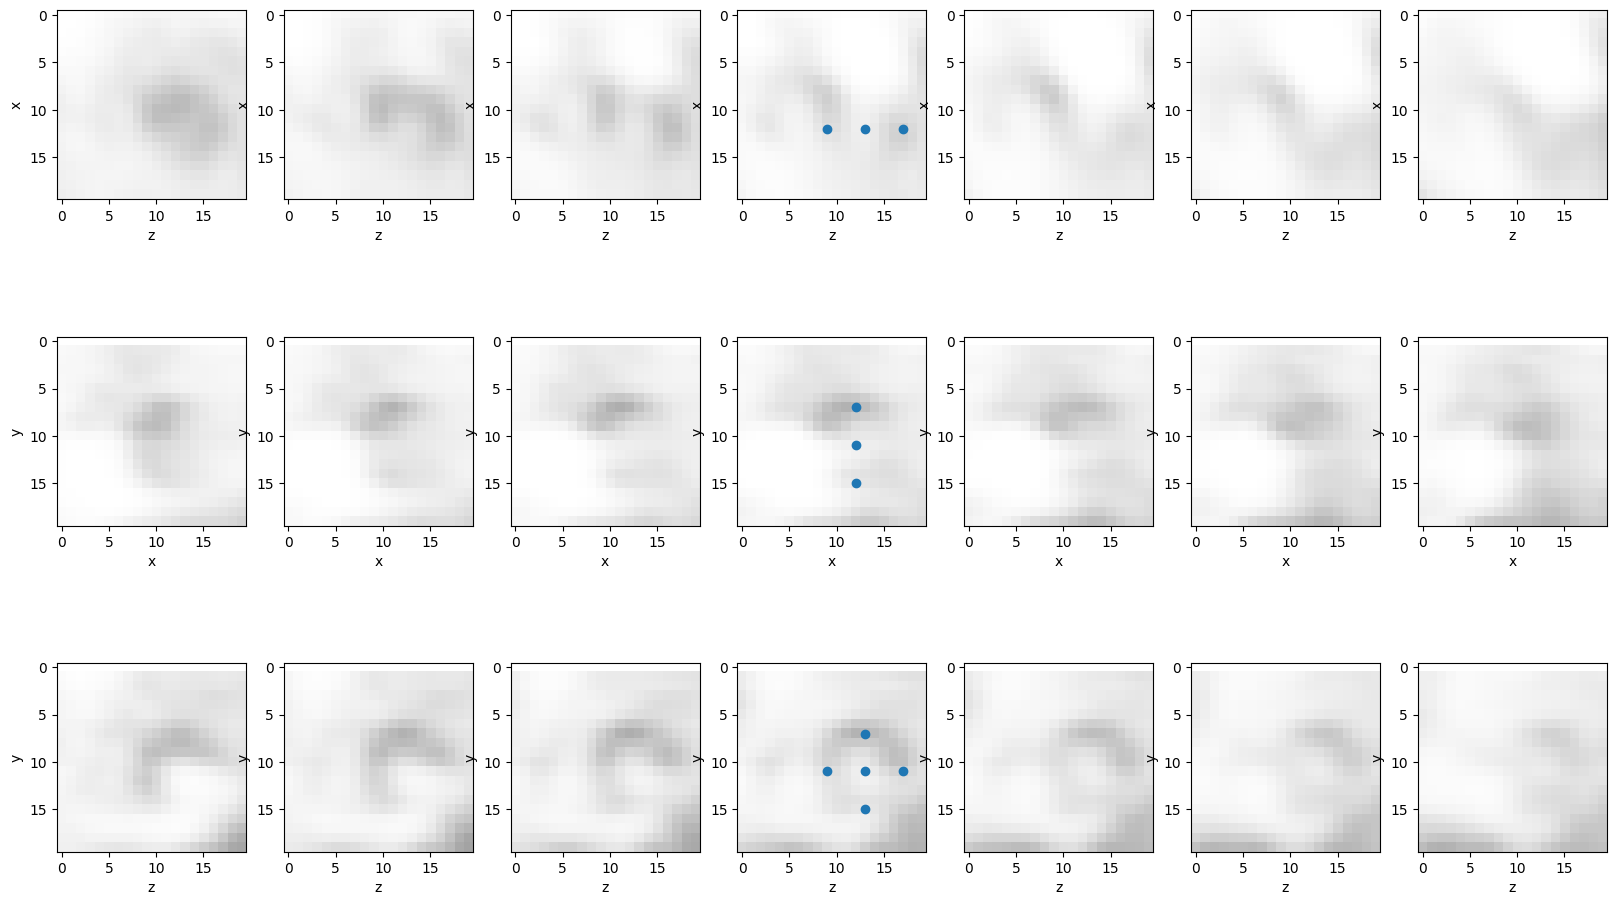

In [99]:
def guessSegmentation(db,setup,pId='MM',visitName='MIR',sx=32,sy=31,sz=31):

   idFilter={'variable':'PatientId','value':pId,'oper':'eq'}
   visitFilter={'variable':'visitName','value':visitName,'oper':'eq'}  
   rows=getData.getPatients(db,setup,[idFilter,visitFilter])
   r=rows[0] 
   pixels=segmentation.guessPixelPosition4(sx,sy,sz) 
   segmentation.updateSegmentation(db,setup,r,pixels)

#guessSegmentation(db,setup,sz=32,sx=33)
def doPlotSegmentation(db,fb,setup,pId='MM',visitName='MIR',vmax=1000):
   idFilter={'variable':'PatientId','value':pId,'oper':'eq'}
   visitFilter={'variable':'visitName','value':visitName,'oper':'eq'}  
   rows=getData.getPatients(db,setup,[idFilter,visitFilter])
   r=rows[0] 
   segmentation.plotSegmentation(db,fb,r,setup,vmax)

pId='MM'
visitName='OBR'
guessSegmentation(db,setup,pId,visitName,sx=32,sy=31,sz=33)
doPlotSegmentation(db,fb,setup,pId,visitName,vmax=500)

In [80]:
#rarely used. Mostly, segmentation points are edited in LabKey
rows=getData.getPatients(db,setup)
for r in rows:
    print('******{}******'.format(config.getCode(r,setup)))
    segmentation.writeSegmentation(db,r,setup)

******10KF_MIR******
******10KF_OBR******
******MM_MIR******
******MM_MIR1******
******MM_OBR******


FileNotFoundError: [Errno 2] No such file or directory: '/home/studen/temp/dynamicSPECT/MM_OBR/MM_OBR_Segmentation.txt'